In [1]:
library(igraph)
library(data.table)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
df = fread(file="movie_edgelist.txt")

Read 41030666 rows and 3 (of 3) columns from 1.769 GB file in 00:00:16


In [3]:
colnames(df) = c("n1", "n2", "weight")

In [4]:
g = simplify( graph.data.frame(df, directed=FALSE))

In [5]:
names = V(g)$name

In [6]:
vcount(g)

[1] 90829

In [7]:
ecount(g)

[1] 40939838

In [8]:
community = fastgreedy.community(g)

In [11]:
saveRDS(community, "community.rds")

In [12]:
modularity(community)

[1] 0.7500726

In [14]:
sizes(community)

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
 5725  1076 25963  4203  2856  3710  5083    33  3529  6607  8154   705 16185 
   14    15    16    17    18    19 
 1188  2356  1438   862   722   434 

In [15]:
comm = readRDS("community.rds")

In [16]:
sizes(comm)

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
 5725  1076 25963  4203  2856  3710  5083    33  3529  6607  8154   705 16185 
   14    15    16    17    18    19 
 1188  2356  1438   862   722   434 

In [17]:
V(g)$community = comm$membership

In [18]:
table(V(g)$community)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
 5725  1076 25963  4203  2856  3710  5083    33  3529  6607  8154   705 16185 
   14    15    16    17    18    19 
 1188  2356  1438   862   722   434 

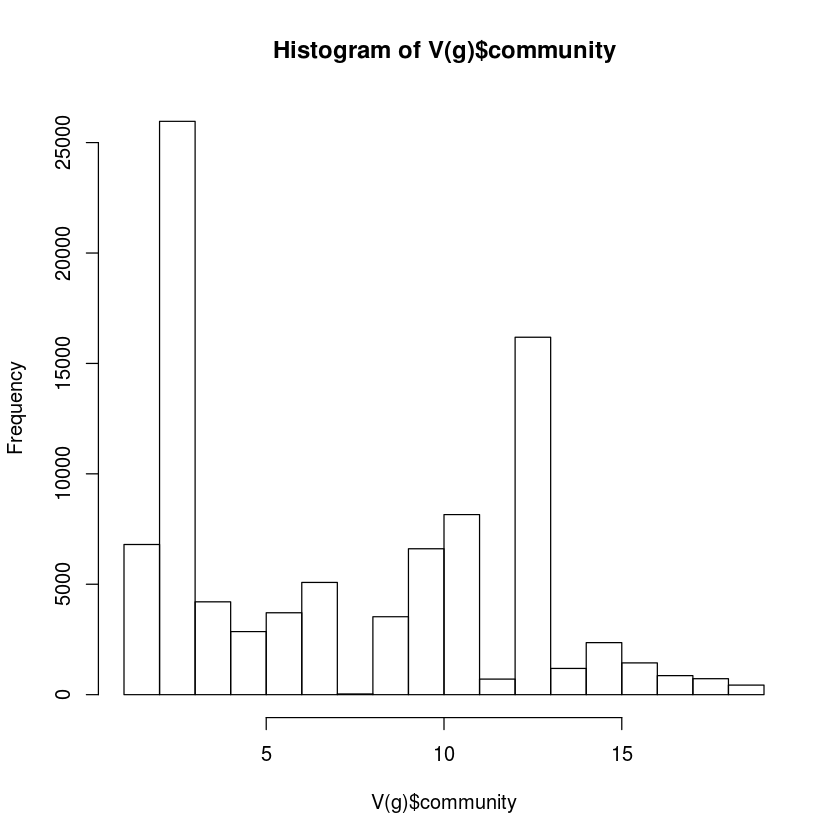

In [19]:
hist(V(g)$community)

In [20]:
saveRDS(g, "graph.rds")